In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

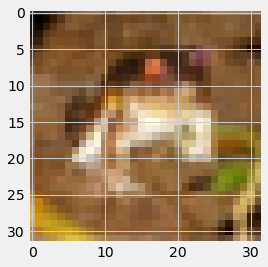

In [ ]:
img = plt.imshow(x_train[index])


In [ ]:
print('The image label is: ', y_train[index])

The image label is:  [6]


In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is: ', classification[y_train[index][0]])

The image class is:  frog


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('The one hot label is:', y_train_one_hot[0])


The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Normalize the pixels in the images to be a value between 0 and 1 , they are normally values between 0 and 255, doing this will help the neural network.

x_train = x_train / 255
x_test = x_test / 255


In [ ]:
#create the architecture
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(500, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(125, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
hist=model.fit(x_train, y_train_one_hot, batch_size=128, epochs=50, validation_data=(x_test, y_test_one_hot))


Epoch 1/50
391/391 [==============================] - 12s 29ms/step - loss: 0.2871 - accuracy: 0.2742 - val_loss: 0.2298 - val_accuracy: 0.4595
Epoch 2/50
391/391 [==============================] - 10s 26ms/step - loss: 0.1993 - accuracy: 0.5484 - val_loss: 0.1685 - val_accuracy: 0.6160
Epoch 3/50
391/391 [==============================] - 10s 27ms/step - loss: 0.1614 - accuracy: 0.6551 - val_loss: 0.1376 - val_accuracy: 0.7068
Epoch 4/50
391/391 [==============================] - 11s 28ms/step - loss: 0.1389 - accuracy: 0.7101 - val_loss: 0.1253 - val_accuracy: 0.7399
Epoch 5/50
391/391 [==============================] - 10s 27ms/step - loss: 0.1273 - accuracy: 0.7383 - val_loss: 0.1191 - val_accuracy: 0.7494
Epoch 6/50
391/391 [==============================] - 10s 26ms/step - loss: 0.1155 - accuracy: 0.7630 - val_loss: 0.1175 - val_accuracy: 0.7598
Epoch 7/50
391/391 [==============================] - 10s 27ms/step - loss: 0.1075 - accuracy: 0.7805 - val_loss: 0.1084 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0983 - accuracy: 0.8391


0.8391000032424927

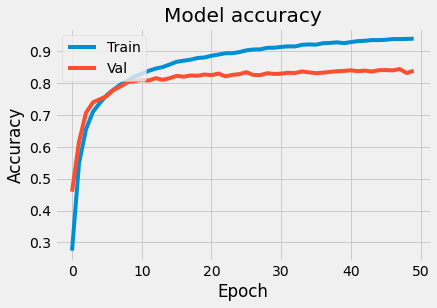

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

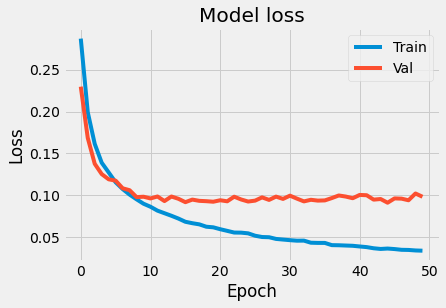

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving automobile image.webp to automobile image.webp


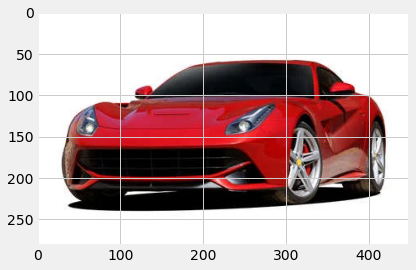

In [ ]:
new_image = plt.imread("automobile image.webp")
img = plt.imshow(new_image)

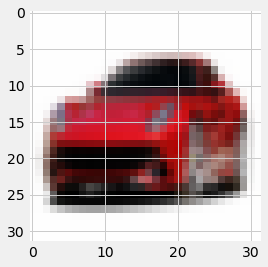

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array( [resized_image] ))
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

automobile : 100.0 %
truck : 0.0 %
ship : 0.0 %
frog : 0.0 %
airplane : 0.0 %
